<a href="https://colab.research.google.com/github/momopmkr/momo/blob/main/%EC%96%B4%EB%A6%B0%EC%99%95%EC%9E%90_%EC%B1%85_%EB%AA%85%EC%82%AC_%EB%B9%88%EB%8F%84%EC%88%98_%EC%83%81%EC%9C%84_20%EA%B0%9C_%EA%B5%AC%ED%95%98%EA%B8%B0_%EC%95%88%EC%9D%80%EC%98%81_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,599 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120829 files and dire

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install konlpy
!pip install sklearn
!pip install WordCloud

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import csv

with open('./sample_data/어린왕자.txt', 'r', encoding='cp949') as f:
  text = f.read()

okt = Okt()
words=okt.nouns(text) # 명사만 추출
words = [n for n in words if len(n) > 1] # 단어의 길이가 1개인 것은 제외

count = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
f.close()

noun_list=count.most_common(10)

for v in noun_list:
  print(v)

with open("./sample_data/어린왕자_명사리스트.txt",'w', newline='',encoding='euc-kr') as f:
  csvw=csv.writer(f)
  for v in noun_list:
    csvw.writerow(v)

#with open("./sample_data/어린왕자_명사리스트.txt",'w',encoding='cp949') as f:
# for v in noun_list:
#	f.write(" ".join(map(str,v)))
#	f.write("\n")


('왕자', 183)
('사람', 133)
('그것', 56)
('다시', 54)
('생각', 52)
('대답', 50)
('아저씨', 41)
('때문', 34)
('여우', 34)
('그림', 32)


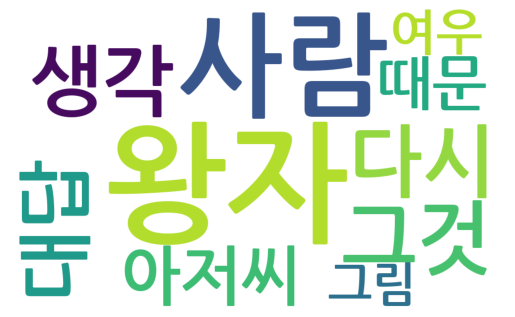

In [13]:
import sys
# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정(window에서)
#font_path = 'malgun'  # C:/Windows/Fonts/
#font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
# 워드클라우드로 그래프로 시각화
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path = font_path)
plt.imshow(wc.generate_from_frequencies(dict(noun_list))) #딕셔너리
plt.axis("off")
plt.show()
wc.to_file(f'./sample_data/어린왕자_워드클라우드.png')


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정(window에서)
# font_path = 'malgun'  # C:/Windows/Fonts/
font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# (토큰명, 빈도수) 딕셔너리 타입으로 변환
data = dict(zip(feature_name, count))

# 워드클라우드로 그래프로 시각화
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file(f'./sample_data/{keyword}_워드클라우드.png')

In [ ]:
plt.rcParams.update({'font.family' : 'Malgun Gothic',
					'figure.dpi' : 120,
					'figure.figsize' : [6.5,6]})
sns.barplot(data =top20, y='words' ,x='n')

NameError: ignored

In [ ]:
import re
temp = re.sub('[^가-힣]',' ',temp) # 한글 아닌 모든 문자 공백으로 바꿈. [^가-힣] : 한글이 아닌 모든 문자를 의미하는 정규 표현식.

# 명사 추출
import konlpy
hannanum = konply.tag.Hannanum()
temp = hannanum.nouns(temp)

# 데이터 프레임으로 변환
import pandas as pd
df_word = pd.DataFrame({'word':nouns})

# 데이터 프레임에 글자 수(count) 추가
df_word['count'] = df_word['word'].str.len()
df_word = df_word.groupby('word',as_index=False)
				.agg(n=('word','count'))
				.sort_values('n', ascending = False)

# 빈도 상위 20개 추출 후 막대 그래프 만들기
plt.rcParams.update({'font.family' : 'Malgun Gothic',
					'figure.dpi' : 120,
					'figure.figsize' : [6.5,6]})
sns.barplot(data =top20, y='word' ,x='n')

In [ ]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

OSError: ignored